In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import shutil
import tensorflow as tf
import cv2

In [56]:
processedImage1 = "./data_source/2/preprocessed_images"
baseImage1 = "./data_source/2/image_data"
baseImage2 = "./data_source/1"
train_dir = "./datasets/train"
validation_dir = "./datasets/validation"
cataractTrain_dir = os.path.join(train_dir + "/", 'cataract')
cataractVal_dir = os.path.join(validation_dir + "/", 'cataract')
normalTrain_dir = os.path.join(train_dir + "/", 'normal')
normalVal_dir = os.path.join(validation_dir + "/", 'normal')
baseCataract2 = os.path.join(baseImage2 + "/", '2_cataract')
baseNormal2 = os.path.join(baseImage2 + "/", '1_normal')

# Filtering dataset 1

In [3]:
df = pd.read_csv("./data_source/2/full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [4]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [5]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [6]:
df["right_cataract"][1:5]
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,left_cataract,right_cataract
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,1,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,0,0
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,0,0
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,0,0


In [7]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values

In [8]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [9]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [10]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]


array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [11]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [12]:
# print(cataract)
# print(normal)
print(left_cataract)
print(right_cataract)

['0_left.jpg' '81_left.jpg' '103_left.jpg' '119_left.jpg' '254_left.jpg'
 '294_left.jpg' '330_left.jpg' '448_left.jpg' '465_left.jpg'
 '477_left.jpg' '553_left.jpg' '560_left.jpg' '594_left.jpg'
 '611_left.jpg' '625_left.jpg' '629_left.jpg' '691_left.jpg'
 '726_left.jpg' '750_left.jpg' '809_left.jpg' '820_left.jpg'
 '824_left.jpg' '874_left.jpg' '907_left.jpg' '970_left.jpg'
 '999_left.jpg' '1083_left.jpg' '1102_left.jpg' '1115_left.jpg'
 '1144_left.jpg' '1164_left.jpg' '1285_left.jpg' '1415_left.jpg'
 '1435_left.jpg' '1444_left.jpg' '1452_left.jpg' '1468_left.jpg'
 '1483_left.jpg' '1484_left.jpg' '1987_left.jpg' '1994_left.jpg'
 '2052_left.jpg' '2098_left.jpg' '2099_left.jpg' '2101_left.jpg'
 '2102_left.jpg' '2103_left.jpg' '2104_left.jpg' '2105_left.jpg'
 '2108_left.jpg' '2109_left.jpg' '2110_left.jpg' '2111_left.jpg'
 '2113_left.jpg' '2114_left.jpg' '2116_left.jpg' '2117_left.jpg'
 '2120_left.jpg' '2121_left.jpg' '2122_left.jpg' '2123_left.jpg'
 '2124_left.jpg' '2125_left.jpg' '2126

In [13]:
# random.shuffle(cataract)
# random.shuffle(normal)
train_cataract = cataract[:494]
val_cataract = cataract[494:]
train_normal = normal[:400]
val_normal = normal[400:]
# print(train_cataract)
# print(val_cataract)
# print(train_normal)
# print(val_normal)

In [14]:
print(len(cataract),len(normal))
print(len(train_cataract),len(val_cataract))
print(len(train_normal),len(val_normal))

594 500
494 100
400 100


In [15]:
def move_image(itemList, destinationDirectory, sourceDirectory):
    for image in os.listdir(sourceDirectory):
        if image in itemList:
            name = os.path.join(sourceDirectory + "/", image)
            if os.path.isfile(name):
                shutil.copy(name, destinationDirectory)
            else:
                print ("file does not exist", name)

In [16]:
move_image(train_cataract, cataractTrain_dir, processedImage1)
move_image(val_cataract, cataractVal_dir, processedImage1)
move_image(train_normal, normalTrain_dir, processedImage1)
move_image(val_normal, normalVal_dir, processedImage1)

In [17]:
tc = 0
vc = 0
tn = 0
vn = 0

for item in os.listdir(cataractTrain_dir):
    tc += 1
for item in os.listdir(cataractVal_dir):
    vc += 1
for item in os.listdir(normalTrain_dir):
    tn += 1
for item in os.listdir(normalVal_dir):
    vn += 1
    
# 400 dari 594
print(tc) # 301 dari 494 (miss 93)
print(vc) # 99 dari 100 (miss 1)
# 484 dari 500
print(tn) # 387 dari 400 (miss 13)
print(vn) # 97 dari 100 (miss 3)

306
100
387
97


In [18]:
processed_trainCataract = os.listdir(cataractTrain_dir)
processed_valCataract = os.listdir(cataractVal_dir)
processed_trainNormal = os.listdir(normalTrain_dir)
processed_valNormal = os.listdir(normalVal_dir)

missing_trainCataract = []
missing_valCataract = []
missing_trainNormal = []
missing_valNormal = []

In [19]:
def missing_image(itemList, missingList, processedList):
    for item in itemList:
        if item not in processedList:
            missingList.append(item)

In [20]:
missing_image(train_cataract, missing_trainCataract, processed_trainCataract)
missing_image(val_cataract, missing_valCataract, processed_valCataract)
missing_image(train_normal, missing_trainNormal, processed_trainNormal)
missing_image(val_normal, missing_valNormal, processed_valNormal)

In [21]:
print(missing_trainCataract)
print(missing_valCataract)
print(missing_trainNormal)
print(missing_valNormal)
# there are some missing image in train and validation for cataract

[]
[]
[]
[]


In [22]:
seen = {}
duplicate = []
for item in train_cataract:
    if item not in seen:
        seen[item] = 1
    else:
        if seen[item] == 1:
            duplicate.append(item)
        seen[item] += 1

print(train_cataract)
print(seen)
print(len(duplicate))
        
# after examining the list, there are duplicate within the list. that is why the image that we get is less than what expected
# the duplicate itself come from the csv file that was included in the dataset
# after id 4784 the csv in the dataset repeat its content duplicating its value
# and there are actual missing data in the preprocessed_image folder

['0_left.jpg' '81_left.jpg' '103_left.jpg' '119_left.jpg' '254_left.jpg'
 '294_left.jpg' '330_left.jpg' '448_left.jpg' '465_left.jpg'
 '477_left.jpg' '553_left.jpg' '560_left.jpg' '594_left.jpg'
 '611_left.jpg' '625_left.jpg' '629_left.jpg' '691_left.jpg'
 '726_left.jpg' '750_left.jpg' '809_left.jpg' '820_left.jpg'
 '824_left.jpg' '874_left.jpg' '907_left.jpg' '970_left.jpg'
 '999_left.jpg' '1083_left.jpg' '1102_left.jpg' '1115_left.jpg'
 '1144_left.jpg' '1164_left.jpg' '1285_left.jpg' '1415_left.jpg'
 '1435_left.jpg' '1444_left.jpg' '1452_left.jpg' '1468_left.jpg'
 '1483_left.jpg' '1484_left.jpg' '1987_left.jpg' '1994_left.jpg'
 '2052_left.jpg' '2098_left.jpg' '2099_left.jpg' '2101_left.jpg'
 '2102_left.jpg' '2103_left.jpg' '2104_left.jpg' '2105_left.jpg'
 '2108_left.jpg' '2109_left.jpg' '2110_left.jpg' '2111_left.jpg'
 '2113_left.jpg' '2114_left.jpg' '2116_left.jpg' '2117_left.jpg'
 '2120_left.jpg' '2121_left.jpg' '2122_left.jpg' '2123_left.jpg'
 '2124_left.jpg' '2125_left.jpg' '2126

In [23]:
def crop_image(itemList, destinationDirectory, sourceDirectory):
    for image in os.listdir(sourceDirectory):
        if image in itemList:
            image_path = os.path.join(sourceDirectory + "/", image)
            image_temp = cv2.imread(image_path)
            cropped_image = image_temp[0:,600:2900]
            cropped_path = os.path.join(destinationDirectory + "/", image)
            cv2.imwrite(cropped_path, cropped_image)

In [24]:
# Tried to cropped all of them at once 
# after checking result
# only works for '2244_left.jpg', '2251_left.jpg' on cataract train
# the picture have various pixel value
crop_image(missing_trainCataract, cataractTrain_dir, baseImage1)
crop_image(missing_valCataract, cataractVal_dir, baseImage1)

In [25]:
# manually cropped ['2102_left.jpg', '2231_left.jpg', '1456_right.jpg']
# ['2229_right.jpg']

In [26]:
def cropped_path(destination_path ,image):
    return os.path.join(destination_path + "/", image)

In [27]:
# 2102_left.jpg

In [28]:
image = cv2.imread(baseImage1 + "/2102_left.jpg")

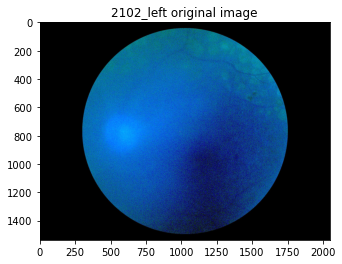

In [29]:
plt.title("2102_left original image")
plt.imshow(image)

In [30]:
cropped_image = image[0:,250:1800]

In [31]:
cropped_image.shape

(1536, 1550, 3)

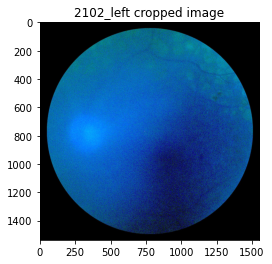

In [32]:
plt.title("2102_left cropped image")
plt.imshow(cropped_image)

In [33]:
cv2.imwrite(cropped_path(cataractTrain_dir, "2102_left.jpg"), cropped_image)

True

In [34]:
# 2231_left.jpg

In [35]:
image = cv2.imread(baseImage1 + "/2231_left.jpg")

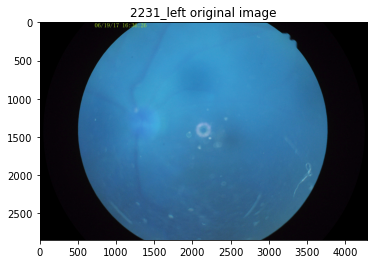

In [36]:
plt.title("2231_left original image")
plt.imshow(image)

In [37]:
cropped_image = image[0:,400:3800]

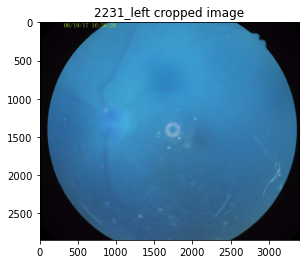

In [38]:
plt.title("2231_left cropped image")
plt.imshow(cropped_image)

In [39]:
cv2.imwrite(cropped_path(cataractTrain_dir, "2231_left.jpg"), cropped_image)

True

In [40]:
# 1456_right.jpg

In [41]:
image = cv2.imread(baseImage1 + "/1456_right.jpg")

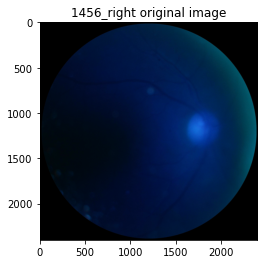

In [42]:
plt.title("1456_right original image")
plt.imshow(image)

In [43]:
# no cropping needed after inspection

In [44]:
cv2.imwrite(cropped_path(cataractTrain_dir, "1456_right.jpg"), image)

True

In [45]:
# 2229_right.jpg

In [46]:
image = cv2.imread(baseImage1 + "/2229_right.jpg")

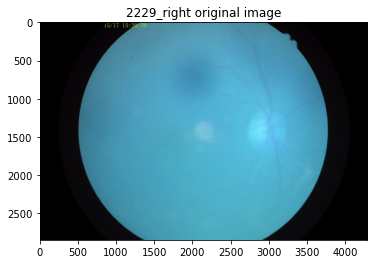

In [47]:
plt.title("2229_right original image")
plt.imshow(image)

In [48]:
cropped_image = image[0:,400:3800]

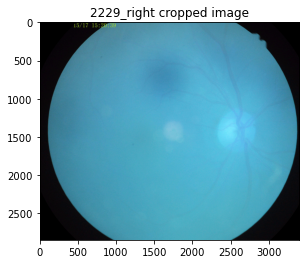

In [49]:
plt.title("2229_right cropped image")
plt.imshow(cropped_image)

In [50]:
cv2.imwrite(cropped_path(cataractVal_dir, "2229_right.jpg"), cropped_image)

True

In [51]:
tc = 0
vc = 0
tn = 0
vn = 0

for item in os.listdir(cataractTrain_dir):
    tc += 1
for item in os.listdir(cataractVal_dir):
    vc += 1
for item in os.listdir(normalTrain_dir):
    tn += 1
for item in os.listdir(normalVal_dir):
    vn += 1
    
# 400 dari 594
print(tc) # 306 dari 494 (5 missing image solved)
print(vc) # 100 dari 100 (1 missing image solved)
# 484 dari 500
print(tn) # 387 dari 400
print(vn) # 97 dari 100

306
100
387
97


# Filtering dataset 2

In [61]:
cataract2 = os.listdir(baseCataract2)
normal2 = os.listdir(baseNormal2)
train_cataract2 = cataract2[:94] 
# val_cataract2 = 
train_normal2 = normal2[:13]
val_normal2 = normal2[13:16]

In [62]:
print(len(cataract2))
print(len(normal2))
print(len(train_cataract2))
print(len(train_normal2))
print(len(val_normal2))

100
300
94
13
3


In [63]:
def crop_image2(itemList, destinationDirectory, sourceDirectory):
    for image in os.listdir(sourceDirectory):
        if image in itemList:
            image_path = os.path.join(sourceDirectory + "/", image)
            image_temp = cv2.imread(image_path)
            cropped_image = image_temp[0:,430:2150]
            cropped_path = os.path.join(destinationDirectory + "/", image)
            cv2.imwrite(cropped_path, cropped_image)

In [64]:
crop_image2(train_cataract2, cataractTrain_dir, baseCataract2)
crop_image2(train_normal2, normalTrain_dir, baseNormal2)
crop_image2(val_normal2, normalVal_dir, baseNormal2)

In [94]:
tc = 0
vc = 0
tn = 0
vn = 0

for item in os.listdir(cataractTrain_dir):
    tc += 1
for item in os.listdir(cataractVal_dir):
    vc += 1
for item in os.listdir(normalTrain_dir):
    tn += 1
for item in os.listdir(normalVal_dir):
    vn += 1
    
# 400 dari 594
print(tc) # 306 dari 494 (5 missing image solved)
print(vc) # 100 dari 100 (1 missing image solved)
# 484 dari 500
print(tn) # 387 dari 400
print(vn) # 97 dari 100

400
100
400
100


In [ ]:
# after checking result in cataract train directory
# some picture was not centered in the cropping
# [cataract_005, cataract_020, cataract_027, cataract_052, cataract_063]
# manually crop one by one

In [ ]:
# cataract_005

In [66]:
image = cv2.imread(baseCataract2 + "/cataract_005.png")

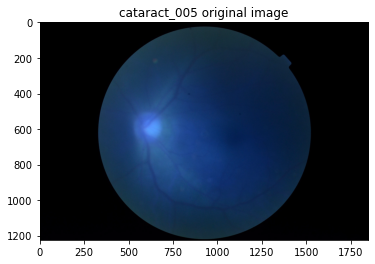

In [67]:
plt.title("cataract_005 original image")
plt.imshow(image)

In [70]:
cropped_image = image[0:,250:1600]

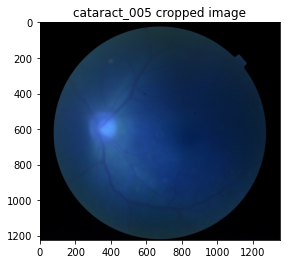

In [71]:
plt.title("cataract_005 cropped image")
plt.imshow(cropped_image)

In [72]:
cv2.imwrite(cropped_path(cataractTrain_dir, "cataract_005.png"), cropped_image)

True

In [ ]:
# cataract_020

In [73]:
image = cv2.imread(baseCataract2 + "/cataract_020.png")

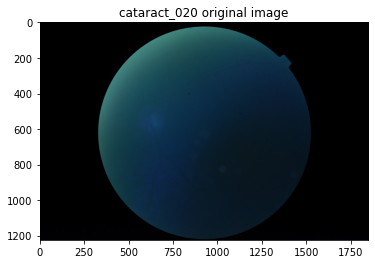

In [74]:
plt.title("cataract_020 original image")
plt.imshow(image)

In [75]:
cropped_image = image[0:,250:1600]

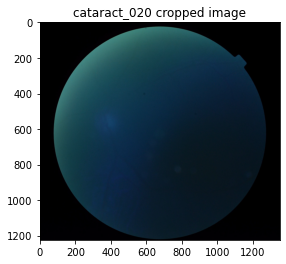

In [76]:
plt.title("cataract_020 cropped image")
plt.imshow(cropped_image)

In [77]:
cv2.imwrite(cropped_path(cataractTrain_dir, "cataract_020.png"), cropped_image)

True

In [ ]:
# cataract_027

In [78]:
image = cv2.imread(baseCataract2 + "/cataract_027.png")

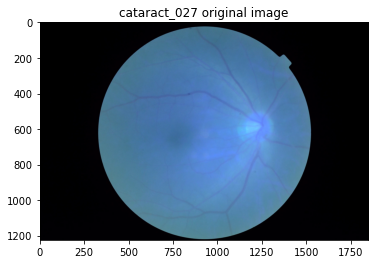

In [79]:
plt.title("cataract_027 original image")
plt.imshow(image)

In [80]:
cropped_image = image[0:,250:1600]

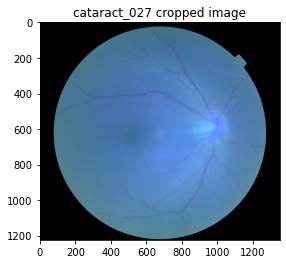

In [81]:
plt.title("cataract_027 cropped image")
plt.imshow(cropped_image)

In [82]:
cv2.imwrite(cropped_path(cataractTrain_dir, "cataract_027.png"), cropped_image)

True

In [ ]:
# cataract_052

In [83]:
image = cv2.imread(baseCataract2 + "/cataract_052.png")

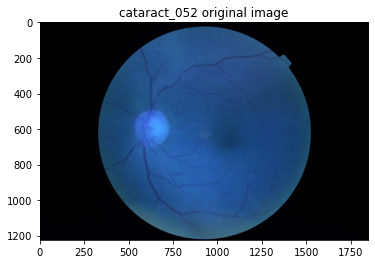

In [84]:
plt.title("cataract_052 original image")
plt.imshow(image)

In [85]:
cropped_image = image[0:,250:1600]

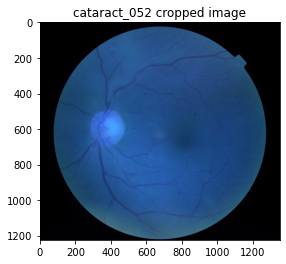

In [86]:
plt.title("cataract_052 cropped image")
plt.imshow(cropped_image)

In [87]:
cv2.imwrite(cropped_path(cataractTrain_dir, "cataract_052.png"), cropped_image)

True

In [ ]:
# cataract_063

In [88]:
image = cv2.imread(baseCataract2 + "/cataract_063.png")

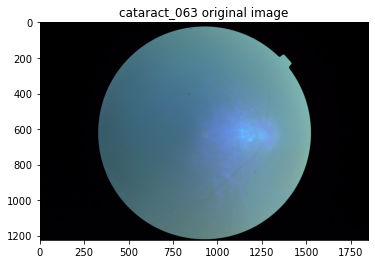

In [91]:
plt.title("cataract_063 original image")
plt.imshow(image)

In [90]:
cropped_image = image[0:,250:1600]

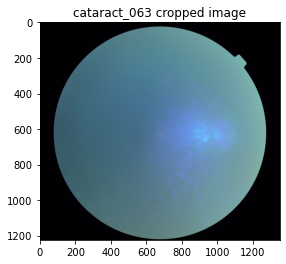

In [92]:
plt.title("cataract_063 cropped image")
plt.imshow(cropped_image)

In [93]:
cv2.imwrite(cropped_path(cataractTrain_dir, "cataract_063.png"), cropped_image)

True